In [28]:
!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [29]:
!pip install textblob



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [30]:
!pip install wordcloud


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


In [32]:
import pandas as pd

# Replace with your actual file name
df = pd.read_csv("Reddit Comments.csv")

# Display the top 5 rows
df.head()


,subreddit,body,controversiality,score
0,gameofthrones,Your submission has been automatically removed...,0,1
1,aww,"Dont squeeze her with you massive hand, you me...",0,19
2,gaming,It's pretty well known and it was a paid produ...,0,3
3,news,You know we have laws against that currently c...,0,10
4,politics,"Yes, there is a difference between gentle supp...",0,1


In [33]:
import re

def clean_text(text):
    text = str(text)  # ensure it's a string
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"\[.*?\]", "", text)  # remove text in square brackets
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove punctuation/numbers
    text = text.lower()  # lowercase everything
    return text


In [34]:
df['clean_text'] = df['body'].apply(clean_text)


In [35]:
df = df[df['clean_text'].str.strip().notnull()]  # removes NaN/None
df = df[df['clean_text'] != '']  # removes truly empty strings


In [36]:
df[['body', 'clean_text']].head(10)


,body,clean_text
0,Your submission has been automatically removed...,your submission has been automatically removed...
1,"Dont squeeze her with you massive hand, you me...",dont squeeze her with you massive hand you mea...
2,It's pretty well known and it was a paid produ...,its pretty well known and it was a paid produc...
3,You know we have laws against that currently c...,you know we have laws against that currently c...
4,"Yes, there is a difference between gentle supp...",yes there is a difference between gentle suppr...
5,Please let this become a meme. I want some Dar...,please let this become a meme i want some dark...
6,I would be less worried about how he fucked up...,i would be less worried about how he fucked up...
7,REPORT: Water is wet.,report water is wet
8,How many millions have to suffer and die for t...,how many millions have to suffer and die for t...
9,What an amazing tradition!!! So special!!!,what an amazing tradition so special


In [37]:
from textblob import TextBlob

# Apply TextBlob sentiment analysis
df['polarity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [38]:
def label_sentiment(score):
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['polarity'].apply(label_sentiment)


In [39]:
df[['body', 'clean_text', 'polarity', 'sentiment']].head(10)


,body,clean_text,polarity,sentiment
0,Your submission has been automatically removed...,your submission has been automatically removed...,0.366667,positive
1,"Dont squeeze her with you massive hand, you me...",dont squeeze her with you massive hand you mea...,-0.104167,negative
2,It's pretty well known and it was a paid produ...,its pretty well known and it was a paid produc...,0.337500,positive
3,You know we have laws against that currently c...,you know we have laws against that currently c...,0.000000,neutral
4,"Yes, there is a difference between gentle supp...",yes there is a difference between gentle suppr...,0.202778,positive
5,Please let this become a meme. I want some Dar...,please let this become a meme i want some dark...,-0.150000,negative
6,I would be less worried about how he fucked up...,i would be less worried about how he fucked up...,-0.063333,negative
7,REPORT: Water is wet.,report water is wet,-0.100000,negative
8,How many millions have to suffer and die for t...,how many millions have to suffer and die for t...,0.500000,positive
9,What an amazing tradition!!! So special!!!,what an amazing tradition so special,0.478571,positive


/var/folders/7x/84r33q815zg4mp70ltbj3jzm0000gn/T/ipykernel_79851/2844871615.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


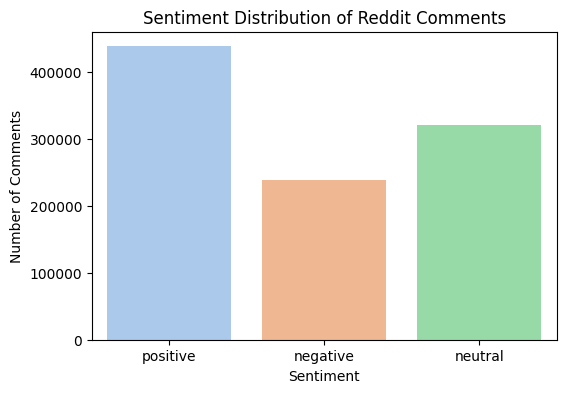

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title("Sentiment Distribution of Reddit Comments")
plt.xlabel("Sentiment")
plt.ylabel("Number of Comments")
plt.show()


In [41]:
df['sentiment'].value_counts()


sentiment
positive    438786
neutral     320612
negative    238892
Name: count, dtype: int64

In [42]:
df.columns


Index(['subreddit', 'body', 'controversiality', 'score', 'clean_text',
       'polarity', 'sentiment'],
      dtype='object')

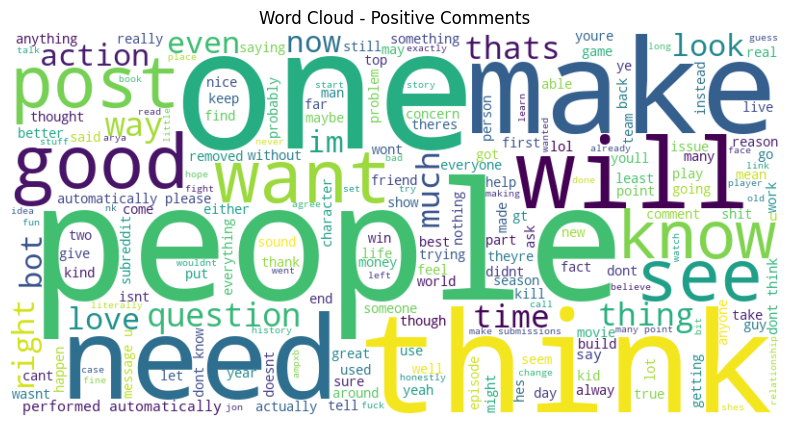

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all positive cleaned comments into one big string
positive_text = " ".join(df[df['sentiment'] == 'positive']['clean_text'].dropna().tolist())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display it
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Positive Comments")
plt.show()


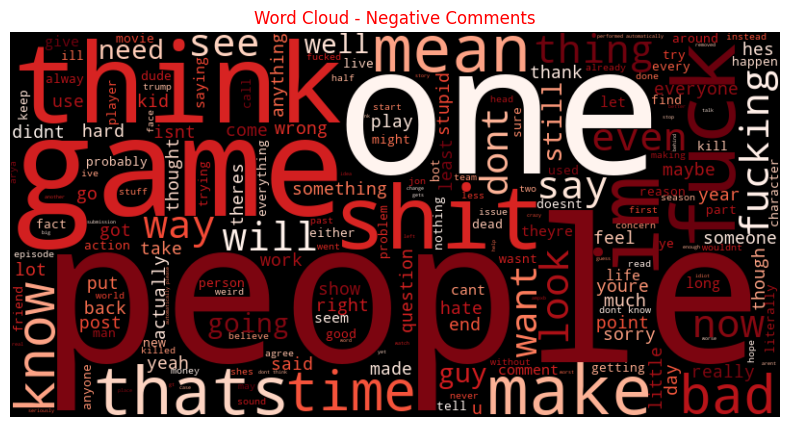

In [44]:
negative_text = " ".join(df[df['sentiment'] == 'negative']['clean_text'].dropna().tolist())

wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Negative Comments", color='red')
plt.show()


In [45]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a matrix of word counts (bag of words)
vectorizer = CountVectorizer(stop_words='english', max_df=0.9, min_df=10)
X = vectorizer.fit_transform(df['clean_text'])


In [46]:
from sklearn.decomposition import LatentDirichletAllocation

# Set number of topics (can be adjusted)
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)


LatentDirichletAllocation(n_components=5, random_state=42)

In [47]:
terms = vectorizer.get_feature_names_out()

for idx, topic in enumerate(lda.components_):
    print(f"\n🧵 Topic #{idx + 1}:")
    print([terms[i] for i in topic.argsort()[-10:]])  # Top 10 words per topic



🧵 Topic #1:
['people', 'really', 'think', 'time', 'good', 'im', 'dont', 'game', 'like', 'just']

🧵 Topic #2:
['want', 'thats', 'know', 'youre', 'think', 'im', 'just', 'dont', 'like', 'people']

🧵 Topic #3:
['build', 'good', 'thanks', 'karma', 'like', 'movie', 'need', 'make', 'just', 'time']

🧵 Topic #4:
['episode', 'think', 'downvote', 'night', 'meme', 'dank', 'like', 'comment', 'im', 'just']

🧵 Topic #5:
['posts', 'submission', 'performed', 'concerns', 'removed', 'action', 'questions', 'bot', 'automatically', 'post']


In [48]:
df.to_csv("cleaned_reddit_sentiment.csv", index=False)


In [50]:
df.head(50)

,subreddit,body,controversiality,score,clean_text,polarity,sentiment
0,gameofthrones,Your submission has been automatically removed...,0,1,your submission has been automatically removed...,0.366667,positive
1,aww,"Dont squeeze her with you massive hand, you me...",0,19,dont squeeze her with you massive hand you mea...,-0.104167,negative
2,gaming,It's pretty well known and it was a paid produ...,0,3,its pretty well known and it was a paid produc...,0.337500,positive
3,news,You know we have laws against that currently c...,0,10,you know we have laws against that currently c...,0.000000,neutral
4,politics,"Yes, there is a difference between gentle supp...",0,1,yes there is a difference between gentle suppr...,0.202778,positive
5,dankmemes,Please let this become a meme. I want some Dar...,0,2,please let this become a meme i want some dark...,-0.150000,negative
6,relationship_advice,I would be less worried about how he fucked up...,0,7,i would be less worried about how he fucked up...,-0.063333,negative
7,nba,REPORT: Water is wet.,0,9,report water is wet,-0.100000,negative
8,worldnews,How many millions have to suffer and die for t...,0,3,how many millions have to suffer and die for t...,0.500000,positive
9,aww,What an amazing tradition!!! So special!!!,0,3,what an amazing tradition so special,0.478571,positive


In [52]:
final_df = df[['subreddit', 'body', 'clean_text', 'polarity', 'sentiment', 'score']]


In [53]:
final_df.head()

,subreddit,body,clean_text,polarity,sentiment,score
0,gameofthrones,Your submission has been automatically removed...,your submission has been automatically removed...,0.366667,positive,1
1,aww,"Dont squeeze her with you massive hand, you me...",dont squeeze her with you massive hand you mea...,-0.104167,negative,19
2,gaming,It's pretty well known and it was a paid produ...,its pretty well known and it was a paid produc...,0.337500,positive,3
3,news,You know we have laws against that currently c...,you know we have laws against that currently c...,0.000000,neutral,10
4,politics,"Yes, there is a difference between gentle supp...",yes there is a difference between gentle suppr...,0.202778,positive,1


In [54]:
final_df = final_df.dropna(subset=['body', 'clean_text', 'polarity', 'sentiment'])


In [55]:
final_df.to_csv("cleaned_reddit_sentiment_clean.csv", index=False)


In [56]:
!pip install openpyxl



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [58]:
import re

# Define a regex pattern to remove illegal characters (non-printable ASCII)
def remove_illegal_chars(text):
    try:
        return re.sub(r'[\x00-\x1F\x7F-\x9F]', '', str(text))
    except:
        return ""

# Apply it to text columns
final_df['body'] = final_df['body'].apply(remove_illegal_chars)
final_df['clean_text'] = final_df['clean_text'].apply(remove_illegal_chars)


In [59]:
final_df.to_excel("cleaned_reddit_sentiment_clean.xlsx", index=False)
